In [1]:
import IPython.display as disp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pylab
import math


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Inferential Statistics
Author: William Truong

The following are notes taken from Udacity's [Intro to Inferential Statistics course](https://www.udacity.com/course/intro-to-inferential-statistics--ud201).

## Lesson 8: Estimation
### Confidence Intervals
#### Key Ideas
* Point Estimate
* Margin of Error
* Confidence Interval
* Treatment Effect
* Critical Z-score

#### Review
* Z-Score
* Standard Deviation
* Sampling Distribution
* Standard Error

**Point Estimation** involves the use of sample data to calculate a single value which is to serve as a “best guess” or “best estimate” of an unknown population parameter.

The **Margin of error** of a distribution is the amount of error we predict when estimating the population parameters from sample statistics. The margin of error is computed as:

$$ Z^*\cdot {\sigma \over \sqrt{n}}$$

Where $Z^*$ is the critical z-score for the level of confidence.

Recap:

* 95% of sample means fall within 1.96 SE of the population mean.
* 98% of sample means fall within 2.33 SE of the population mean.

The **critical z-score** is used to define a critical region for our confidence interval. Observations beyond this critical region are considered so extreme that they were very unlikely to have just happened by chance.

**Confidence Interval** is a range of values in which we suspect the population parameter lies between. To compute the confidence interval we use the formula:
$$\bar{x} \pm Z^* \cdot {\sigma \over \sqrt{n}}$$

This gives us an upper and lower bound that capture our population mean.

The **treatment effect** occurs after an intervention is introduced with a big enough sample size so that the confidence interval doesn’t contain the original population mean, which also implies that it’s highly unlikely that the sample mean after the intervention could have been selected by chance. A visual indicator of this is when the sample mean is far on the tails of the sampling distribution, and therefore unlikely to have occurred by chance.

#### Observations
* Bigger samples gives us more precise estimates by giving us smaller intervals because they shrink the standard deviation if the sampling distribution.
  * As the sample size increases, the range of the confidence interval decreases.
* +/- 2.33 are the critical values of Z for 98% confidence.
* +/-1.96 are the critical values of Z for 95% confidence.

## Lesson 9: Hypothesis Testing
### Hypothesis Testing
#### Key Ideas
* What is a Hypothesis Test
* Alpha Level
* Null Hypothesis
* Alternative Hypothesis
* Critical region
* One tailed/directional hypothesis test
* Two tailed/directional hypothesis test

A **hypothesis test** is used to test a claim that someone has about how an observation may be different from the known population parameter. The **alpha level** (⍺) of a hypothesis tests helps us determine the critical region of a distribution.


The **null hypothesis** is always an equality. It is the claim we are trying to provide evidence against. We commonly write the null hypothesis as one of the following:
$$H_0:\mu_0 = \mu$$
$$H_0:\mu_0 \geq \mu$$
$$H_0:\mu_0 \leq \mu$$

The **alternative hypothesis** is the result we are checking against the claim. This is always some kind of inequality. We commonly write the alternative hypothesis as one of the following:

$$H_0:\mu_0 \ne \mu$$
$$H_0:\mu_0 \lt \mu$$
$$H_0:\mu_0 \gt \mu$$

The **critical region** of the sampling distribution of a statistic is also known as the ⍺ region. It is the area, or areas, of the sampling distribution of a statistic that will lead to the rejection of the hypothesis tested when that hypothesis is true. 

We choose a **one tailed** or **directional hypothesis test** when we predict a direction of the treatment effect. We choose a **two tailed** or **non-directional hypothesis test** when we do not predict a direction of the treatment effect.

#### Example:
A town’s census from 2001 reported that the average age of people living there was 32.3 years with a standard deviation of 2.1 years. The town takes a sample of 25 people and finds their average age to be 38.4 years. Test the claim that the average age of people in the town has increased. (Use an ⍺ level of 0.05)

First let's define our hypothesis:
$$H_0:\mu_0 = 32.3\ years$$
$$H_a:\mu_0 \gt 32.3\ years$$

We will be using a one tailed t-test in the positive direction.

Calculate the z-score:

In [2]:
mu = 32.3
x_bar = 38.4
sigma = 2.1
n = 25
SE = sigma/math.sqrt(n)
z_critical = st.norm.ppf(.95)
print("z-critical: {0:.2f}".format(z_critical))

z_score = (x_bar - mu)/SE
print("z = {0:.2f}".format(z_score))

z-critical: 1.64
z = 14.52


Since our z score is much greater than Z critical, we reject the claim (reject the null) that the average age of people living there is 32.3 years.

#### Observations
* The null hypothesis assumes that there is no significant difference between the current population parameters and what will be the population parameters after the intervention.
* The alternative hypothesis guesses there will be a significant difference.
* We can’t prove that the null hypothesis is false. We can only retain evidence to reject the null hypothesis.

### Error Types
#### Key Ideas
* Type 1 Error
* Type 2 Error

A **Type I Error** is when you reject the null when the null hypothesis is actually true. The probability of committing a Type I error is ⍺.

A **Type II Error** is when you fail to reject the null when it is actually false. The probability of committing a Type II error is β.

## Lesson 10: t-Tests (Student's t test)
### t-distribution
#### Key Ideas

* T-Test
* T-Statistic
* Difference between one-tailed and two-tailed tests?

The Z-test works when we know μ and σ. However often times, we must draw conclusions from samples:

* How different a sample mean is from a population.
* How different two sample means are from each other.
* Can either be dependent or independent.

In the absence of population standard deviation, we will need to use a standard deviation dependent on a sample. This is called the t-distribution.

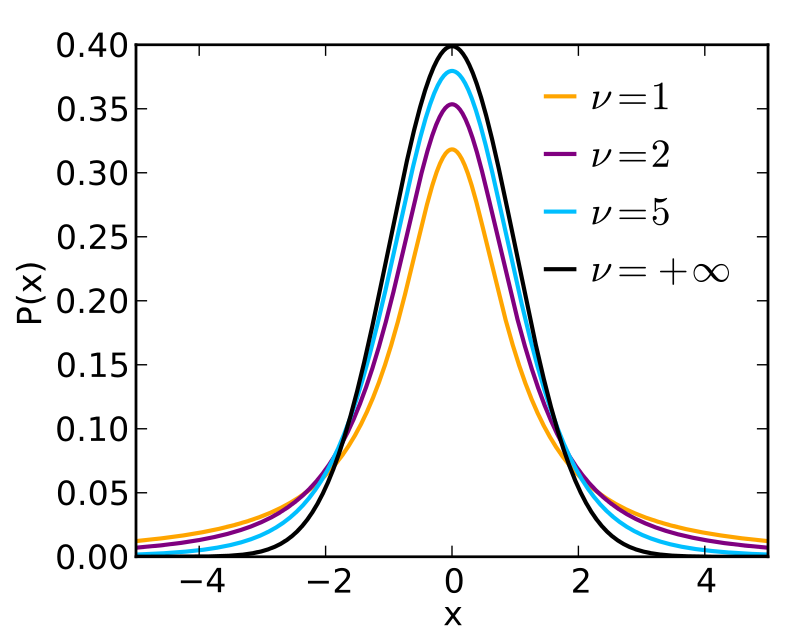

In [3]:
disp.Image("images/students_t_distribution.png", width = 400, height = 400)

The t distribution is more prone to error. It’s more spread out and thicker in the tails than a normal distribution.

To calculate standard deviation:
$$S = \sqrt{\frac{\sum{(x_i-\bar{x})^2}}{n-1}}$$

Note that we use n-1 here because t distributions are defined by their degrees of freedom. There are n-1 degrees of freedom because the nth value is the constraint and doesn’t vary after we know the mean. n-1 is also called the effective sample size.

The **t-Test** is best to use when you do not know the population standard deviation. Instead we use the sample standard deviation.

The t-Test statistic can be computed very similarly to the z-stat. To compute the **t-statistic** we compute:
$$t = {\bar{x} - \mu \over {\sigma \over \sqrt{n}}} $$

#### Example
What's the t-critical value for a one-tailed alpha level of 0.05 with 12 degrees of freedom?

In [4]:
st.t.ppf(1-0.05,12)

1.7822875556491591

You have a sample of size 30. What are the t-critical values for a two-tailed test with $\alpha=0.5$?

In [5]:
critical = st.t.ppf(.05/2, 29)
print(critical,-1*critical)

(-2.0452296421327034, 2.0452296421327034)


Your sample is size 24 and you get a t-statistic of 2.45. The area to the right of the t-statistic is what?

In [6]:
print(round(1 - st.t.cdf(2.45,23),4))

0.0112


#### Example:
To determine whether there is a significant change in beak width within finches, we will use the t-test. The average recorded beak width of finches = 6.07 mm.

Do finches today have different-sized beak widths than before?

Hypothesis:
$$H_0 : \mu = 6.07$$
$$H_A : \mu \ne 6.07$$

From [Finch Data](https://docs.google.com/spreadsheet/ccc?key=0Alo47BBiqLE0dEQ3UmVCc0tsRzBmNER1UVFzMG1MN3c&usp=sharing), we derive:

In [7]:
# Population mean
mu = 6.07
# Sample size
n = 500
# Degrees of Freedom
df = 499
# Point Estimate
x_bar = 6.469
# Sample Standard Deviation
stddev = 0.396
# t statistic
t = (x_bar - mu)/(stddev/math.sqrt(500))
print("t-statistic: {0:.2f}".format(t))

t-statistic: 22.53


Since the t-statistic is huge, we reject the null hypothesis.

Like the Z-stat we can use a table to get the proportion below or between a specific value. T-tests are also great for testing two sample means(i.e. paired t-tests).

#### Observations
* t-tests are used to find out :
  * How different a sample mean is from a population
  * How different two sample means are from each other.
* t-tests are used when
  * When we don’t know the population standard deviation.
  * Sample size is below 30

#### Additional Information
[Differences between one-tailed and two-tailed tests?](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/tail_tests.htm)

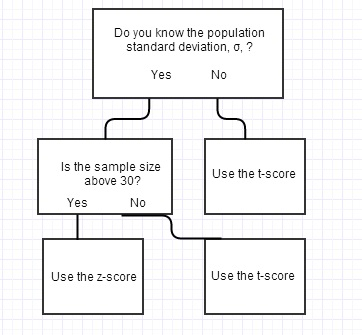

In [8]:
disp.Image("./images/t-score-flowchart.jpg")

### Dependent t-test (Repeated Measures)
#### Key Ideas
* Dependent t-test
* Cohen's d
* Confidence Interval

**Dependent t-test**: Compare two samples that are dependent. They are dependent when the same subject takes the two test twice. Dependent samples deal with within-subject designs

* Two conditions
  * Give same person two different conditions to see how they react
* Pre-test, post-test
  * What was the measurement of the variable before the treatment and after the treatment.
* Growth over time (longitudinal study)
  * Measure some variable at one point in time and at another time to find out what the changes are.
  
Advantages:
* Controls for individual differences
  * Use fewer subjects
  * cost-effective
  * Less time-consuming
  * Less expensive

Disadvantages:
* Carry-over effects
  * Second measurement can be affected by first treatment
  * order may influence results

#### Example of Repeated Measures Design:
Say there are two cellphones with different keyboard configurations. Let’s say a researcher is interested in the effects of these cell phone configurations on errors made in typing text messages. To study this 25 participants used two keyboard types and typed a standardized 20 word text messaged under 30 seconds.

We want to see if there is a significant difference between the number of errors between each keyboard.

$$n=25$$

**Hypotheses**:
$$H_0 : \mu_Q = \mu_A$$
$$H_A : \mu_Q \ne \mu_A$$

1. With the dataset provided: [Keyboards Data](https://docs.google.com/a/knowlabs.com/spreadsheet/ccc?key=0Alo47BBiqLE0dG5lMzdjNFc5MzVqQ1lHbDhoeUZDT1E#gid=0), calculate the means, $\mu_Q,\mu_A$
  * Average number of QWERTY errors: $\mu_Q = 5.08$  
  * Average number of Alphabetical errors: $\mu_A = 7.8$
2. The point estimate is $\mu_Q -\mu_A$ 
3. Then find the standard deviation of differences between the two sets. This will be called $S_D$.
4. Using the t statistic calculated from: $$t = {\mu_Q - \mu_A \over {S_D \over \sqrt{25}}}$$
  * If it doesn't fall into the critical region of $t_{critical}$, retain the null hypothesis, otherwise reject the null.
5. Find the critical interval:
  * The CI can be found by: $$M_D \pm t_{critical} (\frac{S_D}{\sqrt{n}}) $$
  * $t_{critical}$ is calculated using a two-tailed t value with an alpha of .05.
6. Calculate Cohen's d with: $M_D/S_D$

#### Example of Another Method of Finding $S_D$.
How do kids' vocabularies improve over time? Early childhoood education researchers took a random sample of 4 year olds in the United States (n=1000) and had them say a few sentences. On average, the 4 year olds used 3 words per sentence with standard deviation 1.2. Four years later, when the kids were 8, the researchers repeated this with those same kids and this time they used 12 words per sentence on average, with standard deviation 2.7.

$$X_D = \bar{X}_2 - \bar{X}_2  $$
$$S_D = \sqrt{S_1^2 + S_2^2} $$

NOTE: The formula for the standard deviation of differences $S_D$ is for paired samples taken from two different groups, rather than the dependent samples experiment presented here where the same subjects are tracked at different times (paired-samples). Generally, we are unable to compute the standard deviation of differences from the variances of the original groups in a paired-samples experiment. For the purposes of the task, use the formula provided to complete the answers in the problem set.

#### Observations
A hypothesis test examines two opposing hypotheses about a population: the null hypothesis and the alternative hypothesis. The null hypothesis is the statement being tested, and the alternative hypothesis is the statement you want to be able to conclude is true.
* Please note that we never "accept the null." We either reject or fail to reject the null hypothesis.
* A common misconception is that statistical hypothesis tests are designed to select the more likely of the two hypotheses. Instead, a test will remain with the null hypothesis until there is enough evidence (data_ to support the alternative hypothesis.


### Effect size
#### Key Ideas
* Effect Size
* Cohen's d
* $r^2$

**Effect Size**: In experimental studies, this refers to the size of the treatment effect. In nonexperimental studies, this refers to the strength or relationship between variables.  
In the z-test or the t-test:
* the simplest measure of effect size is the mean difference: . 
  * mean differences are great when the variables used are defined with an everyday meaning.  
    * The number of correct items on an exam, or the number of minutes to fix a flat tire.

#### Types of Effect Size Measures:
* mean difference
* standardized differences
* cohen’s d
* correlation measures
  * $r^2$: proportion (%) of variation in one variable that is related to (“explained by”) another variable.

#### Statistical significance:
* rejected the null
* results are not likely due to chance (sampling error)

#### Meaningfulness of Results:
1. What was measured?
   * variables - practical, social, or theoretical importance
2. Effect Size.
3. Can we rule out random chance?
4. Can we rule out alternative explanations? (lurking variables)

**Cohen’s d**: (standardized mean difference) is an effect size measure that measures the effect size of the strength of a phenomenon. Cohen’s d gives us the distance between means in standardized units (in our case how many standard deviations are between the two values). Cohen’s d is computed by:
$$Cohen's\ d=\frac{\bar{x}_1 - \bar{x}_2}{s}$$
where s is the standard deviation.

#### Correlation measures
$r^2$ -  coefficient of determination (strength of relationship between two variables). Value of 0 means variables are not related. 1 means they are perfectly related.
$$r^2 = \frac{t^2}{t^2+df}$$
Note: t is the t statistic here

### Results Section
#### Results Section
1. Descriptive Statistics (M,SD)
  * in text
  * in graphs
  * in tables
2. Inferential Statistics
  * hypothesis test (always provide alpha level)
      * kind of test (one-sample t test)
      * test statistic
      * df
      * p-value
      * direction of level
  * Uses APA style
      * t(df) = X.XX, p = .XX, direction
  * confidence interval, e.g., 95%
    * Lower Limit
    * Upper Limit
    * CI on what?
    * APA style
        * Confidence interval on the mean difference; 95% CI = (4,6)
* Effect size measures
  * Cohen's d = x.xx (leading zero)
  * $r^2$ = .xx (no leading zero)

#### Full one-sample test:
Formulas used:  
$df = n - 1$  
$t = \frac{\bar{x} - \mu}{SEM}$   
$SEM = \frac{S}{\sqrt{n}}$  
$CI=\bar{x}\pm margin\ of\ error$  
$Cohen's\ d=\frac{\bar{x}_1 - \bar{x}_2}{s}$  
$r^2 = \frac{t^2}{t^2+df}$

US families spent an average of $151 per week on food in 2012 (Gallup). Food Now! introduces a food saving program. The treatment will be introducing a cost-saving program to try to get US families to spend less.

The dependent variable here is the amount of money spent per week on food. The treatment is the cost-saving program.

Null hypothesis: The program did not change the cost of food.
$$H_0: \mu{program} \geq 151$$  
Alternative hypothesis: The program reduced the cost of food.
$$H_A: \mu{program} \lt 151$$

A one-tailed in the - direction t test will be used. After the Food Now! program was implemented, the average cost of food per week that people were spending was $126.

In [9]:
n = 25
df = 24
alpha = 0.05
t_crit = -1.711
S = 50
SEM = S/math.sqrt(n)
mu_population = 151
x_bar = 126

t = (x_bar - mu_population)/SEM

print("t statistic: {}".format(t))


t statistic: -2.5


t falls into the critical region since -2.50 < -1.711.

In [10]:
# Cohen's D
cohens_d = (x_bar - mu_population)/float(S)
print("Cohen's D: {}".format(cohens_d))

Cohen's D: -0.5


Cohen's d tells us that these two means are half a standard deviation apart.

In [11]:
# r^2
r_squared = float(t**2)/(t**2 + df)
print("r^2: {:.2}".format(r_squared))

r^2: 0.21


Concerning the differences in food prices for the sample of 25 people, 21% of those differences are due to the cost saving program.

In [12]:
# Margin Error (2-tailed, df = 24, alpha = .05)
2.064 * 10

20.64

CI:  
$126 \pm 20.64$  
$[105.36,146.64]$

Conclusion: If the cost savings plan is implemented, participants are likely to pay between 105.36 to 146.64 dollars per week.

## Lesson 11: t-Tests, Part 3 (Student's t-test)

### Independent Samples (Equal or unequal sample sizes, equal variance)
In this lesson we are going to cover Independent samples. Independent samples deal with between subject designs. The advantages and disadvantages of independent samples are reverse of dependent samples:

#### Advantages
* No carry over effects. We can give one treatment to one individual and a different treatment to another individual and compare differences.
#### Disadvantages
* Need more subjects to control for individual differences
* More costly
* More time consuming

With Independent samples we give:
* Experimental tests
* Observational

### Standard Error
$$SEM = \frac{S}{\sqrt(n)} = \sqrt{\frac{S_1^2 + S_2^2}{n}} = \sqrt{ {S_1^2 \over n_1} + {S_2^2 \over n_2} }$$
$$df = (n_1-1)+(n_2-1) = n_1+n_1-2$$

With this equation, we can find the standard deviation of independent samples with approximately the same sample sizes.

For sample sets with big differences in sample sizes, we need to pool the variances.  
Pooled Variance:  
$$S_P^2 = \frac{SS_1 + SS_2}{df_1 + df_2}$$
where $SS_x = \sum{(x_i-\bar{x})^2}$ and $SS_y = \sum{(y_i-\bar{y})^2}$  
The pooled variance is the average of the two sample variances that corrects for two sample sizes.

$$Standard\ error = S_{\bar{x}-\bar{y}} = \sqrt{ {Sp^2 \over n_1} + {Sp^2 \over n_2} }$$
$$t-statistic = \frac{(\bar{x}-\bar{y}) - (\mu_x - \mu_y)}{S_{\bar{x}-\bar{y}}}$$
Note: We assume the population means are the same. so $(\mu_x - \mu_y)=0$.

## Lesson 14: Correlation:
Now we're going to look into analyzing relationships between two variables:
* Different Design
  * How we collect our data
  * How we visualize our data
* Analysis is similar

For correlation of two variables, we have X, also known as the, feature, covariate, predictor, explanatory, independent variable, and we have Y, the outcome, observation, response, dependent variable. To visualize what the relationship there is between the two variables a scatter plot is often used.

Possible relationships:
* Strong, positive
* Strong, negative
* Weak, positive
* Weak, negative

To quantify these characteristics we can use the correlation coefficient (r), also known as Pearson's r.
$$r=\frac{cov(x,y)}{S_x \cdot S_y}$$
* cov(x,y): how much do x and y vary together.
* $S_x \cdot S_y$ describes how x and y vary apart from each other.
* r is not a percentage.
  * 1 = a strongest positive relation, -1 = weakest negative relation
  * Also known as the correlation coefficient
* $r^2$ = % of the variatian in Y explained by the variation in x. It is also known as the coefficient of determination.

### Hypothesis Testing for $\rho$
Even though two variables look like they have a relationship, they might be due to chance. The actual population might not actually have a relationship. We can be more sure as the sampling size increases to minimize sampling error. How much variation is allowed due to sampling error.

We use Hypothesis Testing to find out:

$\rho$ (rho) = true correlation for population.  
r = correlation for the sample

$$H_0: \rho = 0$$
$$H_A: \rho < 0$$
$$H_A: \rho > 0$$
$$H_A: \rho \ne 0$$

To test the hypothesis we use the t test:
$$t = \frac{r\sqrt{N-2}}{\sqrt{1-r^2}}$$
$$df = n-2$$

After the CI is calculated, if 0 is within the interval, we have no choice but to fail to reject the null.

Correlation vs Causation: To make sure causation is happening we need to make sure the independent variable occurs before the dependent variable.


## Lesson 15: Regresion
### Intro to Linear Regression
We can describe regression by drawing a straight line through the data. This is often called the line of best fit or regression line. The line makes it easier to see the relationship between x and y. We can use the line to predict what the y value will be.

**residual**: the difference between the observed point and the expected point.

One way to find the line of best fit is to minimize the sum of squared residuals.  
To find the slope of the line:
$$b = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{x_i - \bar{x}}^2}$$
$$b = r({S_y \over S_x})$$

To find the y intercept, perform a system of equations with the known $\bar{x}\ and\ \bar{y}$.

### Standard Error of Estimate
$$\sqrt{\frac{\sum{(y-\hat{y})^2}}{N-2}}$$

For quantitiative purposes, we often want a confidence interval for $\hat{y}$ and slope.

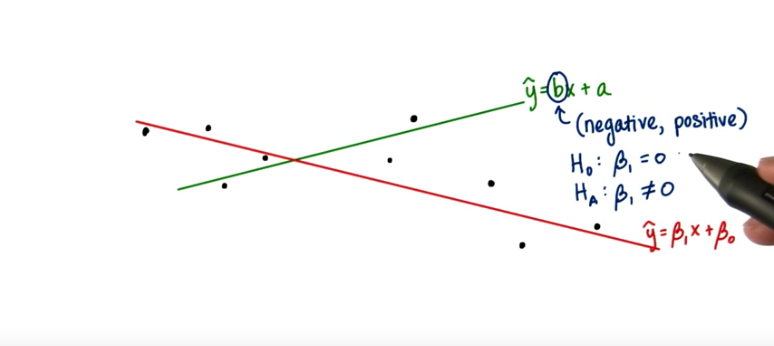

In [14]:
disp.Image("images/linear_regression_slope_CI.png")

The green line is the sample regression line. The red line is the population regression line. In this case, where the sample line is positively slope and the population line is negatively sloping, the CI for b has a negative lower bound and positive upper bound. It includes zero within this range. If we perform a t-Test, we would fail to reject NULL, meaning there is no relationship between x and y.

### Hypothesis Testing for Slope (Same outcome as hypothesis test for r)
We use hypothesis testing for slope to find out if x and y linearly related.
$\beta_1$ = population slope  
$\beta_0$ = population y intercept  
b = sample slope  
a = sample y intercept
df = N-2

### TBD: Multiple Regression


In [15]:
def css_styling():
    styles = open("../css/custom.css", "r").read()
    return disp.HTML(styles)
css_styling()